In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2019-12-28 19:58:04--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2019-12-28 19:58:04 (28.9 MB/s) - ‘moore.csv’ saved [2302/2302]



In [5]:
!ls

moore.csv  sample_data


In [6]:
# To confirm there is no header
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [7]:
df_data = pd.read_csv('moore.csv', header=None)
df_data.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [0]:
# columns = ['Year', 'No of transistors']
# df_data.columns = columns
# df_data.head()

# 	Year	No of transistors
# 0	1971	2300
# 1	1972	3500
# 2	1973	2500
# 3	1973	2500
# 4	1974	4100

In [0]:
X = df_data[0]
Y = df_data[1]
# X.shape           (162,)
# Y.shape           (162,)

X = df_data[0].values
Y = df_data[1].values
# X.shape           (162,)
# Y.shape           (162,)

X = X.reshape(-1,1)
# X.shape           (162, 1)

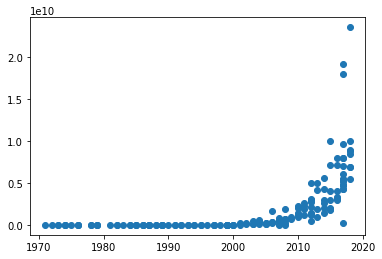

In [10]:
plt.scatter(X, Y)

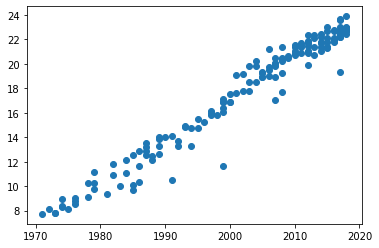

In [11]:
Y = np.log(Y)
plt.scatter(X, Y)

In [0]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()

In [0]:
model = Sequential()
model.add(Dense(1, input_dim=1))

In [0]:
model.compile(
    loss = 'mean_squared_error',
    optimizer = tf.keras.optimizers.SGD(0.001, 0.9)
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
r = model.fit(X, Y, epochs=100)

Train on 162 samples
Epoch 1/100
162/162 [==============================] - 1s 4ms/sample - loss: 369.2448
Epoch 2/100
162/162 [==============================] - 0s 132us/sample - loss: 407.1096
Epoch 3/100
162/162 [==============================] - 0s 158us/sample - loss: 404.8103
Epoch 4/100
162/162 [==============================] - 0s 133us/sample - loss: 221.8261
Epoch 5/100
162/162 [==============================] - 0s 217us/sample - loss: 166.2590
Epoch 6/100
162/162 [==============================] - 0s 158us/sample - loss: 316.0363
Epoch 7/100
162/162 [==============================] - 0s 141us/sample - loss: 299.0369
Epoch 8/100
162/162 [==============================] - 0s 139us/sample - loss: 126.6299
Epoch 9/100
162/162 [==============================] - 0s 141us/sample - loss: 98.5545
Epoch 10/100
162/162 [==============================] - 0s 133us/sample - loss: 43.2231
Epoch 11/100
162/162 [==============================] - 0s 147us/sample - loss: 27.2704
Epoch 12/100
1

Text(0.5, 1.0, 'Training Loss')

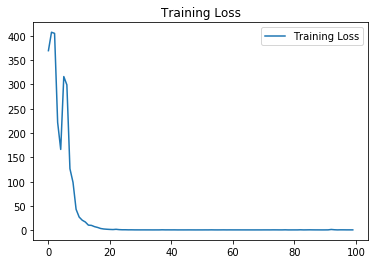

In [17]:
plt.plot(r.history['loss'], label = 'Training Loss')
plt.legend()
plt.title('Training Loss')

In [21]:
model.layers      # Note: there is only 1 layer, the "Input" layer doesn't count

In [22]:
model.get_weights()

[array([[0.32231116]], dtype=float32), array([17.712036], dtype=float32)]

In [23]:
model.layers[0].get_weights()

[array([[0.32231116]], dtype=float32), array([17.712036], dtype=float32)]

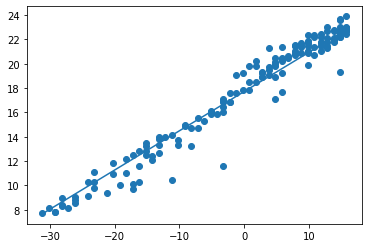

In [30]:
# Making Predictions
Yhat = model.predict(X.flatten())
plt.scatter(X, Y)
plt.plot(X, Yhat)